In [1]:
import requests
from bs4 import BeautifulSoup 
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

_Requesting information from a website_

In [2]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)
response.status_code

200

### Look at Content of the result

In [3]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' /><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n

### Use Beautiful Soup to extract data from HTML

In [4]:
artists = BeautifulSoup(response.content, 'lxml')
print(artists.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [5]:
# print(artists)

### Find tables containing data

In [6]:
names = artists.find_all('div', attrs = {'class': 'vertical-card_content--title'})
# print(names)

In [7]:
dates = artists.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
# print(dates)

### For Loop Finding Artist

In [8]:
artist = []
for i in range(len(names)):
    name = names[i].get_text().replace("\n", "").strip()
    artist.append(name)
print(artist)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


### For Loop Finding Inducted Date

In [9]:
inducted = []
for i in range(len(dates)):
    date = dates[i].get_text().replace("\n", "").strip()
    year = re.sub("[^0-9]", "", date)
    inducted.append(year)
print(inducted)

# year = []
# for element.text in years_list:
#     year.append(element.strip())

# print(year)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


In [10]:
# year = []
# for element.text in years_list:
#     year.append(element.strip())

# print(year)

In [11]:
# type(names)

In [12]:
# len(names)

In [13]:
# result_list= pd.read_html(str(names[3])) # a list of dataframes
# len(result_list)

In [14]:
HOF = pd.DataFrame(list(zip(artist,inducted)),columns=['name','inducted'])
HOF
# names_dates_df = pd.DataFrame([names,dates]).T
# names_dates_df.columns=['Name','Inducted']
# names_dates_df

,name,inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


In [15]:
# HOF['Name'] = HOF['Name'].astype('str')

In [16]:
# HOF['Inducted'].replace('Inducted ', '', regex=True, inplace=True)

### Apply Across All Webpages

_.format allow you to use {} as a place holder in the website URLs_<br>
_Use nested for loops_

In [17]:
## Shoutout to instructors Teng and Joshua for their code help
artists = []
inducted = []
web_address = []

for i in range(1,17):
    url = 'https://countrymusichalloffame.org/hall-of-fame/members/page'
    response = requests.get(url + str(i))
    soup = BeautifulSoup(response.content, 'lxml')
#     print(url + str(i))
    
    artist = soup.find_all('div', attrs = {'class': 'vertical-card_content--title'})
    year = soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
    web = soup.find_all('div', attrs = {'class': 'vertical-card_content'})
    
    for i in artist:
        name = i.h3.text
        artists.append(name)
    
    for i in year:
        y = i.p.text.replace('Inducted ', '').strip()
        inducted.append(y)
    
    for i in web:
        link = i.a['href']
        web_address.append(link)

print(artists)
print(inducted)
print(web_address)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond', 'Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown', 'Jim Ed Brown and the Browns', 'Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Roy Clark', 'Cowboy Jack Clement', 'Patsy Cline', 'Hank Cochran', 'Paul Cohen', 'Floyd Cramer', 'Vernon Dalhart', 'Charlie Daniels', 'Jimmie Davis', 'Jimmy Dean', 'Delmore Brothers', 'Jim Denny', 'Little Jimmy Dickens', 'Ralph Emery', 'The Everly Brothers', 'Flatt And Scruggs', 'Jim Foglesong', 'Red Foley', 'Tennessee Ernie Ford', 'Fred Foster', 'Joseph Frank', 'Lefty Frizzell', 'Connie B. Gay', 'Don Gibson', 'Vince Gill', 'Johnny Gimble', 'Merle Haggard', 'Tom T. Hall', 'Emmylou Harris', 'George D. Hay', 'Homer and Jethro', 'Roy Horton', 'Harlan Howard', 'Ferlin Husky', 'Alan Jackson', 'Sonny Jam

In [18]:
# Josh's Code

# website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/{}'
# artists = []
# inducted = []
# web_address = []
# for page in range(1,17):
#     url = website_url.format(page)
#     response = requests.get(url)
#     artist = BeautifulSoup(response.content, 'lxml')
#     names = artist.find_all('div', attrs = {'class': 'vertical-card_content--title'})
#     dates = artist.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
#     web = artist.find_all('div', attrs = {'class': 'vertical-card_content'})
#     for i in range(len(names)):
#         name = names[i].get_text().replace("\n", "").strip()
#         artists.append(name)
#     for i in range(len(dates)):
#         date = dates[i].get_text().replace("\n", "").strip()
#         year = re.sub("[^0-9]", "", date)
#         inducted.append(year)
#     for i in web: #Credit Teng
#         link = i.a['href']
#         web_address.append(link)
# print(artists)
# print(inducted)
# print(web_address)

In [19]:
hof_full = pd.DataFrame(list(zip(artists,inducted,web_address)),columns=['name','inducted','web'])
hof_full['inducted'] = hof_full['inducted'].astype('int')

In [20]:
hof_full

,name,inducted,web
0,Roy Acuff,1962,https://countrymusichalloffame.org/artist/roy-...
1,Alabama,2005,https://countrymusichalloffame.org/artist/alab...
2,Bill Anderson,2001,https://countrymusichalloffame.org/artist/bill...
3,Eddy Arnold,1966,https://countrymusichalloffame.org/artist/eddy...
4,Chet Atkins,1973,https://countrymusichalloffame.org/artist/chet...
...,...,...,...
135,Hank Williams,1961,https://countrymusichalloffame.org/artist/hank...
136,Bob Wills,1968,https://countrymusichalloffame.org/artist/bob-...
137,Mac Wiseman,2014,https://countrymusichalloffame.org/artist/mac-...
138,Tammy Wynette,1998,https://countrymusichalloffame.org/artist/tamm...


#### Create Visual with Scraped Data

In [21]:
ind_by_year = hof_full.groupby('inducted').count().reset_index()
ind_by_year = ind_by_year.rename({'name': 'count'}, axis=1)
ind_by_year.head()

,inducted,count,web
0,1961,3,3
1,1962,1,1
2,1964,1,1
3,1965,1,1
4,1966,4,4


In [22]:
ind_by_year.max()

inducted    2019
count         12
web           12
dtype: int64

[Text(0, 0.5, 'Total Artists'),
 Text(0.5, 0, 'Year Inducted'),
 Text(0.5, 1.0, 'Inducted Members by Year')]

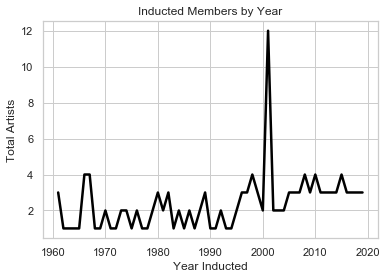

In [23]:
sns.set(style="whitegrid")

figsize=(20,15)
fig = sns.lineplot(x='inducted', y='count', data=ind_by_year, color='black', linewidth=2.5)
fig.set(xlabel='Year Inducted', ylabel='Total Artists', title='Inducted Members by Year')



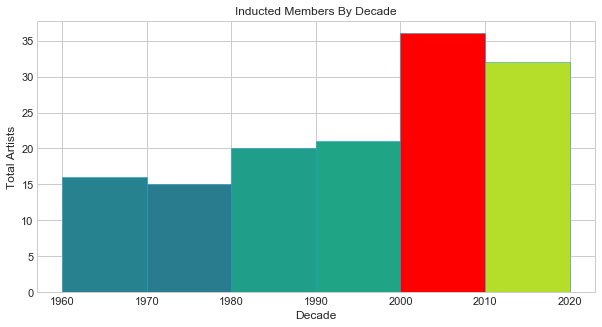

In [24]:
plt.figure(figsize=(10,5)) # Figure size
plt.style.use('seaborn-whitegrid') # Selecting whitegrid style

n, bins, patches = plt.hist(hof_full.inducted, bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020], facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5 )


for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
patches[4].set_fc('red') # Color
patches[4].set_alpha(1) # Opacity
    
# Adding title and labels
plt.title('Inducted Members By Decade')
plt.xlabel('Decade')
plt.ylabel('Total Artists')
plt.show()

### Bonus Question

_scraping each webpage for birth, death and birthplace info_

In [ ]:
birthdeath = []
birthplace = []

for i in hof_full['web']:
#     print(i)
    url = i
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    
    bd = soup.find(string=re.compile('Birth|Death')) #uses regex to find Birth or Death  
    birthdeath.append(bd)

    bp = soup.find(string=re.compile('Birthplace'))
    birthplace.append(bp)
# birthdeath
# birthplace

_combine lists into a dataframe_

In [ ]:
# bd_df = pd.DataFrame(list(zip(birthdeath, birthplace)), columns=['birthday_death', 'birthplace'])
bd_dic = {'birthday_death': birthdeath, 'birthplace': birthplace}
bd_df = pd.DataFrame(bd_dic)
bd_df

In [ ]:
bd_df.head(1)

In [ ]:
bd_df_new = bd_df['birthday_death'].str.split(" - ", n=1, expand=True)
bd_df_new.columns = ['birthday', 'death']

In [ ]:
bd_df_new

In [ ]:
b_new = bd_df_new.birthday.str.replace('Birth: ', '')
d_new = bd_df_new.death.str.replace('Death: ', '')
bp_new = bd_df.birthplace.str.replace('Birthplace: ', '')

In [ ]:
bpbp = {'birth': b_new, 'death': d_new, 'birthplace': bp_new}
bdbp_df = pd.DataFrame(bpbp)
bdbp_df

In [ ]:
final_hof_df = pd.concat([hof_full ,bdbp_df], axis=1, join='inner') #combining dataframes

### Final DataFrame

In [ ]:
final_hof_df.head(20)